In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zillow-prize-1/properties_2017.csv
/kaggle/input/zillow-prize-1/sample_submission.csv
/kaggle/input/zillow-prize-1/zillow_data_dictionary.xlsx
/kaggle/input/zillow-prize-1/train_2016_v2.csv
/kaggle/input/zillow-prize-1/properties_2016.csv
/kaggle/input/zillow-prize-1/train_2017.csv


#Loading the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
info= pd.read_excel("/kaggle/input/zillow-prize-1/zillow_data_dictionary.xlsx")
info

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


#Exploratory Data Analysis (EDA)
EDA is crutial to determine or spot the patterns and features of the data.

Logerror might vary by month (e.g., seasonal trends), location, or property type. High missingness (e.g., 99% in some columns like basementsqft) means we need to prioritize useful features.


In [4]:
train_16 = pd.read_csv("/kaggle/input/zillow-prize-1/train_2016_v2.csv")
train_17 = pd.read_csv("/kaggle/input/zillow-prize-1/train_2017.csv")
props_16 = pd.read_csv("/kaggle/input/zillow-prize-1/properties_2016.csv")
props_17 = pd.read_csv("/kaggle/input/zillow-prize-1/properties_2017.csv")
sample_submission = pd.read_csv("/kaggle/input/zillow-prize-1/sample_submission.csv")

/tmp/ipykernel_13/681082829.py:3: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  props_16 = pd.read_csv("/kaggle/input/zillow-prize-1/properties_2016.csv")
/tmp/ipykernel_13/681082829.py:4: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  props_17 = pd.read_csv("/kaggle/input/zillow-prize-1/properties_2017.csv")


In [5]:
print("DATASET SHAPES")
print(f"Properties 2016: {props_16.shape}")
print(f"Properties 2017: {props_17.shape}")
print(f"Training 2016: {train_16.shape}")
print(f"Training 2017: {train_17.shape}")
print(f"Sample Submission: {sample_submission.shape}")

print("PROPERTIES 2016 - INFO")
print(props_16.info())

print("TRAINING 2016 - INFO")
print(train_16.info())

DATASET SHAPES
Properties 2016: (2985217, 58)
Properties 2017: (2985217, 58)
Training 2016: (90275, 3)
Training 2017: (77613, 3)
Sample Submission: (2985217, 7)
PROPERTIES 2016 - INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsq

In [6]:
print("TARGET VARIABLE ANALYSIS (logerror)")
print(train_16['logerror'].describe())

print("UNIQUE VALUES")

print(f"Unique ParcelIDs in properties: {props_16['parcelid'].nunique()}")
print(f"Unique ParcelIDs in training:   {train_16['parcelid'].nunique()}")
print(f"Training rows per ParcelID:     {train_16['parcelid'].value_counts().mean():.2f}")

TARGET VARIABLE ANALYSIS (logerror)
count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64
UNIQUE VALUES
Unique ParcelIDs in properties: 2985217
Unique ParcelIDs in training:   90150
Training rows per ParcelID:     1.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


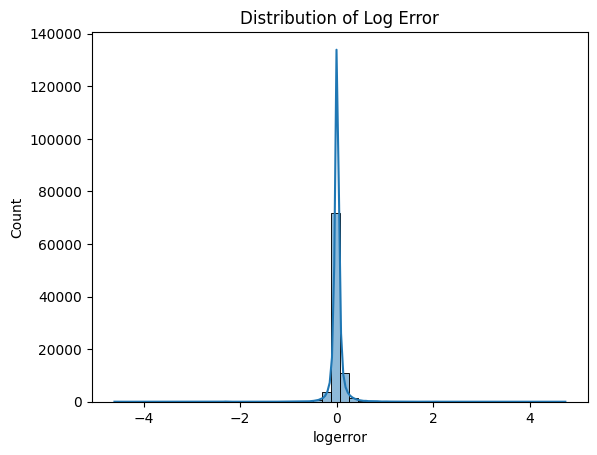

In [7]:
sns.histplot(train_16['logerror'], bins=50, kde=True)
plt.title('Distribution of Log Error')
plt.show()  # Should be symmetric around 0, with outliers.


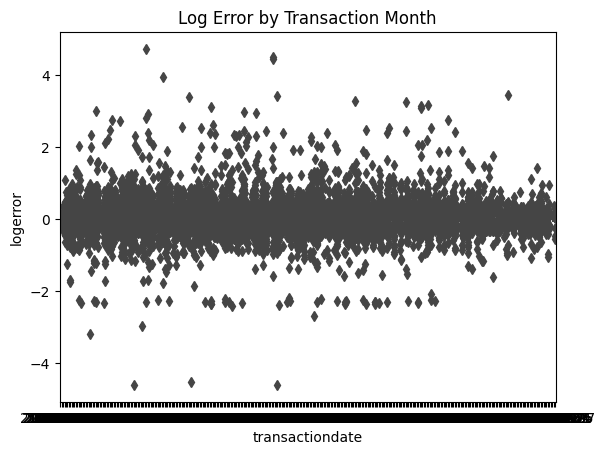

In [8]:
# By month
sns.boxplot(x='transactiondate', y='logerror', data=train_16)
plt.title('Log Error by Transaction Month')
plt.show()  # Check for seasonal bias.

Submissions are evaluated on Mean Absolute Error between the predicted log error and the actual log error. 
The log error is defined as 
                *****Log error=log(Zestimate)-log(SalePrice)*****
and it is recorded in the transactions training data. If a transaction didn't happen for a property during that period of time, that row is ignored and not counted in the calculation of MAE.

In [9]:
df_2016 = train_16.merge(props_16, on="parcelid", how="left")
df_2017 = train_17.merge(props_17, on="parcelid", how="left")
df = pd.concat([df_2016, df_2017], axis=0).reset_index(drop=True)

In [10]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [11]:
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values()
missing_features = missing_pct[missing_pct > 0]
print(missing_features)
high_missing = missing_pct[missing_pct > 80].index
df = df.drop(columns=high_missing)

longitude                        0.020252
propertylandusetypeid            0.020252
rawcensustractandblock           0.020252
regionidcounty                   0.020252
roomcnt                          0.020252
latitude                         0.020252
fips                             0.020252
bedroomcnt                       0.020252
bathroomcnt                      0.020252
assessmentyear                   0.020252
propertycountylandusecode        0.020847
taxvaluedollarcnt                0.021443
landtaxvaluedollarcnt            0.022039
taxamount                        0.026804
regionidzip                      0.070881
structuretaxvaluedollarcnt       0.315091
censustractandblock              0.527733
calculatedfinishedsquarefeet     0.533689
yearbuilt                        0.631373
fullbathcnt                      1.091204
calculatedbathnbr                1.091204
regionidcity                     1.970957
finishedsquarefeet12             4.984871
lotsizesquarefeet               10

In [12]:
df = df[(df['logerror'] > -0.4) & (df['logerror'] < 0.4)]

In [13]:
df.shape

(164299, 37)

In [14]:
def preprocessing(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in numeric_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
    for col in categorical_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            df[col].fillna('MISSING', inplace=True)
            print(f"  {col}: filled {missing_count} missing with 'MISSING'")
    return df

df = preprocessing(df)

  propertycountylandusecode: filled 29 missing with 'MISSING'
  propertyzoningdesc: filled 58137 missing with 'MISSING'


/tmp/ipykernel_13/2243277387.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_13/2243277387.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

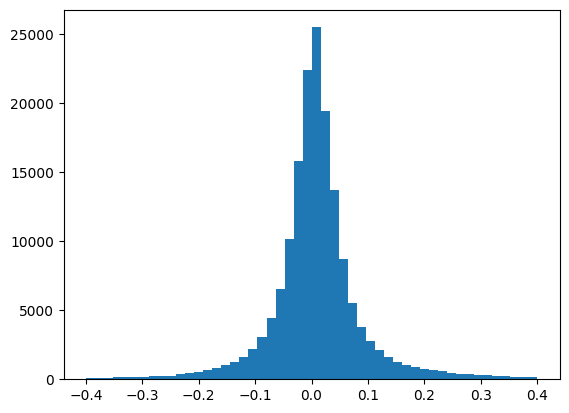

In [15]:
plt.hist(df['logerror'], bins=50)
plt.show()

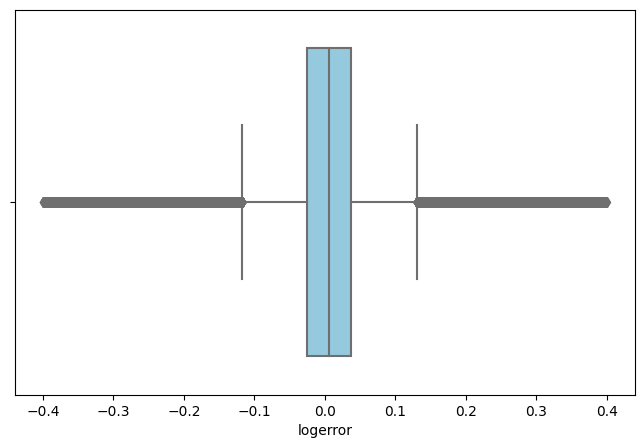

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["logerror"], color="skyblue")
plt.show()

In [17]:
def datetime(df):
    if 'transactiondate' in df.columns:
        df['date'] = pd.to_datetime(df['transactiondate'])
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month
        df['day'] = df['date'].dt.day
        df['quarter'] = df['date'].dt.quarter
        df['month_name'] = df['date'].dt.strftime('%b')
    return df

df = datetime(df)

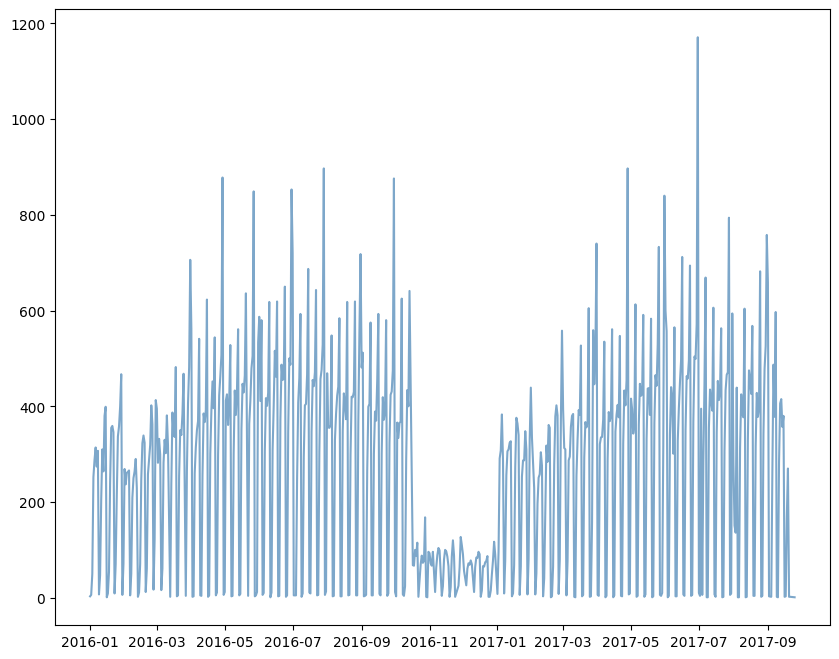

In [18]:
plt.figure(figsize=(10,8))
daily_counts = df.groupby('date').size()
plt.plot(daily_counts.index, daily_counts.values, alpha=0.7, color='steelblue')

In [19]:
def feature_engineering(df):
    if 'yearbuilt' in df.columns:
        df['property_age'] = 2017 - df['yearbuilt']
        df['property_age'] = df['property_age'].clip(lower=0, upper=200)
        
    if 'calculatedfinishedsquarefeet' in df.columns and 'lotsizesquarefeet' in df.columns:
        df['living_area_ratio'] = df['calculatedfinishedsquarefeet'] / (df['lotsizesquarefeet'] + 1)
        df['living_area_ratio'] = df['living_area_ratio'].clip(upper=1)
        df['extra_space'] = df['lotsizesquarefeet'] - df['calculatedfinishedsquarefeet']
        
    if 'taxamount' in df.columns and 'taxvaluedollarcnt' in df.columns:
        df['tax_rate'] = df['taxamount'] / (df['taxvaluedollarcnt'] + 1)
    
    if 'structuretaxvaluedollarcnt' in df.columns and 'landtaxvaluedollarcnt' in df.columns:
        df['structure_land_ratio'] = df['structuretaxvaluedollarcnt'] / (df['landtaxvaluedollarcnt'] + 1)
        df['total_tax_value'] = df['structuretaxvaluedollarcnt'] + df['landtaxvaluedollarcnt']
    
    if 'bedroomcnt' in df.columns and 'bathroomcnt' in df.columns:
        df['total_rooms'] = df['bedroomcnt'] + df['bathroomcnt']
        df['bath_bed_ratio'] = df['bathroomcnt'] / (df['bedroomcnt'] + 1)
    
    if 'bedroomcnt' in df.columns and 'calculatedfinishedsquarefeet' in df.columns:
        df['sqft_per_bedroom'] = df['calculatedfinishedsquarefeet'] / (df['bedroomcnt'] + 1)
    
    if 'roomcnt' in df.columns and 'calculatedfinishedsquarefeet' in df.columns:
        df['sqft_per_room'] = df['calculatedfinishedsquarefeet'] / (df['roomcnt'] + 1)
    
    if 'latitude' in df.columns and 'longitude' in df.columns:
        df['location_sum'] = df['latitude'] + df['longitude']
        df['location_diff'] = df['latitude'] - df['longitude']
        df['location_product'] = df['latitude'] * df['longitude']
    return df

df = feature_engineering(df)

In [20]:
def log_transform(df):
    log_transform_cols = ['taxvaluedollarcnt', 'taxamount', 'calculatedfinishedsquarefeet', 
                          'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']
    
    for col in log_transform_cols:
        if col in df.columns:
            df[f'{col}_log'] = np.log1p(df[col])
    return df

df = log_transform(df)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
def encoding(df):
    exclude_cols = ['parcelid','logerror','transactiondate','date','month_name','age_category']
    all_cols = df.columns
    features = [col for col in all_cols if col not in exclude_cols]
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if categorical_cols:
        label_encoders = {}
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    return df

df = encoding(df)

In [23]:
exclude_cols = ['parcelid','logerror','transactiondate','date','month_name','age_category']
all_cols = df.columns
features = [col for col in all_cols if col not in exclude_cols]

In [24]:
X = df[features]
y = df['logerror']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes: (131439, 57) (32860, 57) (131439,) (32860,)


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131439 entries, 49593 to 124607
Data columns (total 57 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   airconditioningtypeid             131439 non-null  float64
 1   bathroomcnt                       131439 non-null  float64
 2   bedroomcnt                        131439 non-null  float64
 3   buildingqualitytypeid             131439 non-null  float64
 4   calculatedbathnbr                 131439 non-null  float64
 5   calculatedfinishedsquarefeet      131439 non-null  float64
 6   finishedsquarefeet12              131439 non-null  float64
 7   fips                              131439 non-null  float64
 8   fullbathcnt                       131439 non-null  float64
 9   garagecarcnt                      131439 non-null  float64
 10  garagetotalsqft                   131439 non-null  float64
 11  heatingorsystemtypeid             131439 non-null  fl

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X_scaled_full = scaler.fit_transform(X)

In [28]:
y_mean = y_train.mean()
y_std = y_train.std() if y_train.std() != 0 else 1.0
y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

In [29]:
mae = {}
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)
lin_preds_scaled = lin_reg.predict(X_test_scaled)
lin_preds = lin_preds_scaled * y_std + y_mean
lr_mae = mean_absolute_error(y_test, lin_preds)
mae['lin-reg'] = lr_mae
print("Linear Regression MAE :", lr_mae)

Linear Regression MAE : 0.052105073755545024


In [30]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_scaled, y_train_scaled)
ridge_preds_scaled = ridge.predict(X_test_scaled)
ridge_preds = ridge_preds_scaled * y_std + y_mean
ridge_mae = mean_absolute_error(y_test, ridge_preds)
mae['ridge'] = ridge_mae
print("Ridge MAE:", ridge_mae)

Ridge MAE: 0.052102671862621276


In [31]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_scaled, y_train_scaled)
xgb_preds_scaled = xgb.predict(X_test_scaled)
xgb_preds = xgb_preds_scaled * y_std + y_mean
xgb_mae = mean_absolute_error(y_test, xgb_preds)
mae['xgboost'] = xgb_mae
print("XGBoost MAE:", xgb_mae)

XGBoost MAE: 0.0517528157562572


In [32]:
best_model = None
best_mae = float('inf')

for model, mae in mae.items():
    if mae < best_mae:
        best_mae = mae
        best_model = model

print(best_model, best_mae)

xgboost 0.0517528157562572


In [33]:
sample_submission.columns

Index(['ParcelId', '201610', '201611', '201612', '201710', '201711', '201712'], dtype='object')

In [34]:
submission_parcel_ids = sample_submission['ParcelId'].unique()
X_final = props_17[props_17['parcelid'].isin(submission_parcel_ids)]

In [35]:
test_parcelids = X_final['parcelid']

In [36]:
X_final = datetime(X_final) 
X_final = feature_engineering(X_final)

In [37]:
X_final = X_final.drop(columns=high_missing, errors='ignore')
X_final = preprocessing(X_final)
X_final = encoding(X_final)
X_final = log_transform(X_final)

/tmp/ipykernel_13/2243277387.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_13/2243277387.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

  propertycountylandusecode: filled 2999 missing with 'MISSING'
  propertyzoningdesc: filled 1002746 missing with 'MISSING'


In [38]:
X_final = X_final.reindex(columns=X.columns, fill_value=0)

In [39]:
X_final_scaled = scaler.transform(X_final)
X_final_scaled = pd.DataFrame(X_final_scaled, 
                                   index=X_final.index, 
                                   columns=X_final.columns)

In [40]:
xgb_preds_final= xgb.predict(X_final_scaled)
final_test_pred = (xgb_preds_final * y_std) + y_mean

In [41]:
final_predictions_df = pd.DataFrame({
    'parcelid': test_parcelids,
    'logerror_pred': final_test_pred
})
final_predictions_df['parcelid'] = final_predictions_df['parcelid'].astype(int)
print(f"Final predictions generated for {len(final_predictions_df)} properties.")

Final predictions generated for 2985217 properties.


In [42]:
final_predictions_df

,parcelid,logerror_pred
0,10754147,0.040342
1,10759547,-0.016296
2,10843547,-0.108701
3,10859147,-0.023781
4,10879947,-0.043091
...,...,...
2985212,12170430,0.073239
2985213,11422430,0.073239
2985214,17203030,0.073239
2985215,14242830,0.073239


In [43]:
for col in sample_submission.columns[1:]:
    sample_submission[col] = final_predictions_df['logerror_pred']

In [44]:
sample_submission.to_csv("zillow_submission.csv", index=False)
print("Submission file saved as zillow_submission.csv")

Submission file saved as zillow_submission.csv
